# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Fit DBSCAN on a generated dataset


We will start with a simple generated dataset. 

Import the `make_circles` function from `sklearn.datasets`. You can use this to generate some clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

### 1. Plot the generated circles data

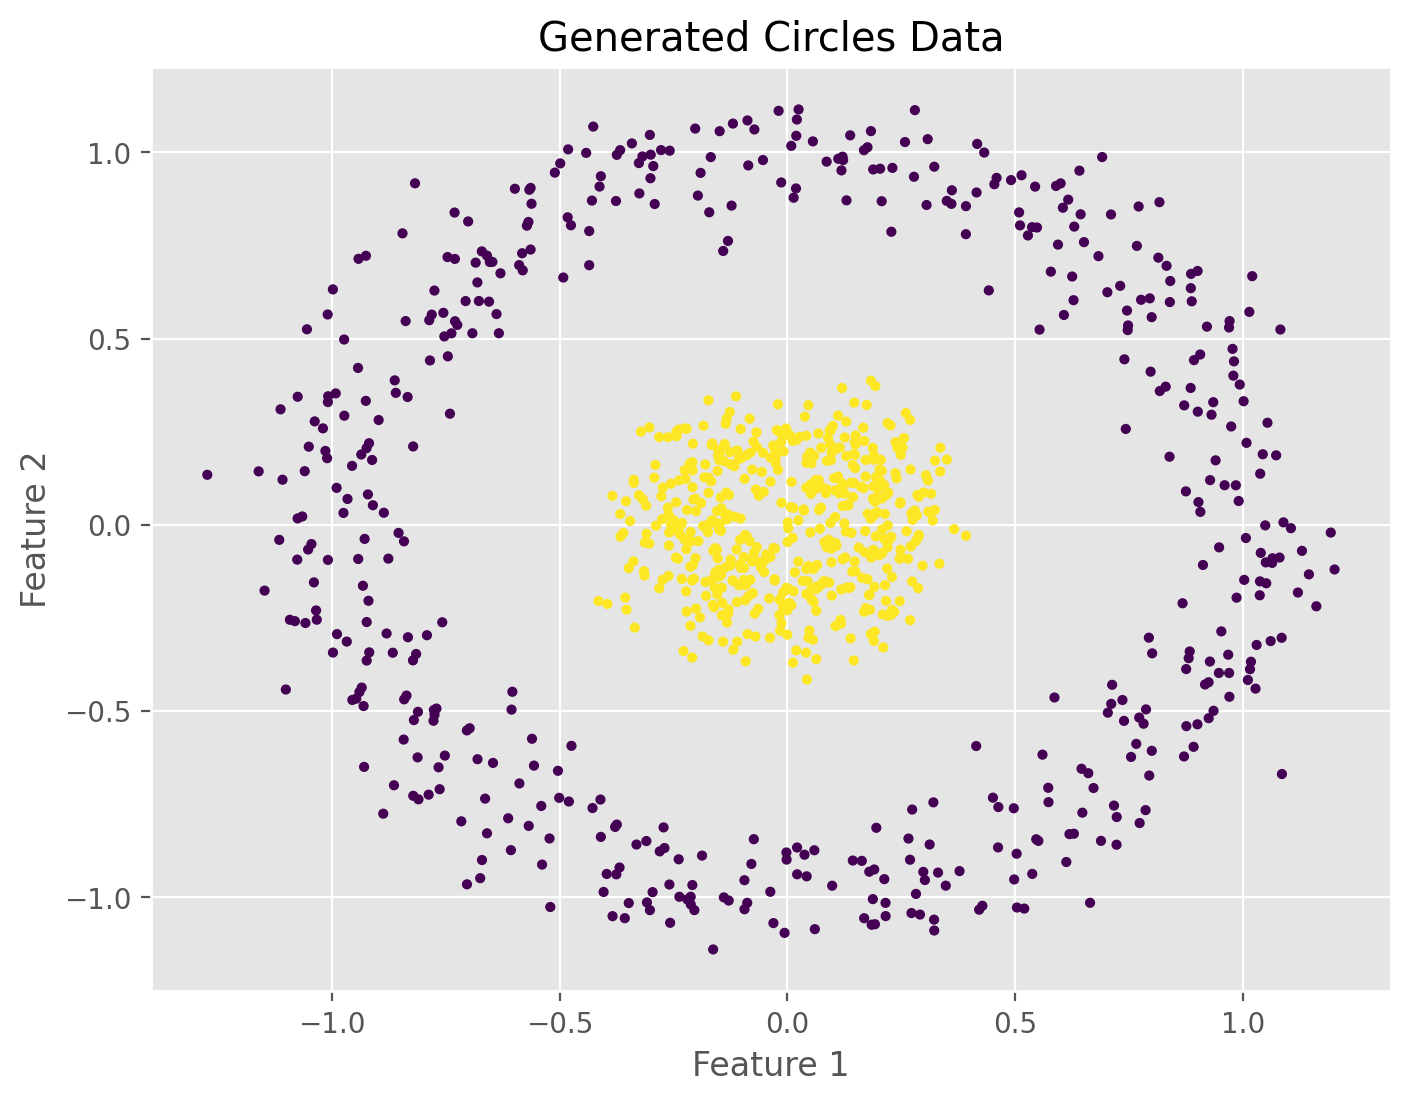

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
# Generate the circles data
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

# Plot the generated circles data
plt.figure(figsize=(8, 6))
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap='viridis', s=10)
plt.title("Generated Circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 2. Rescale the data

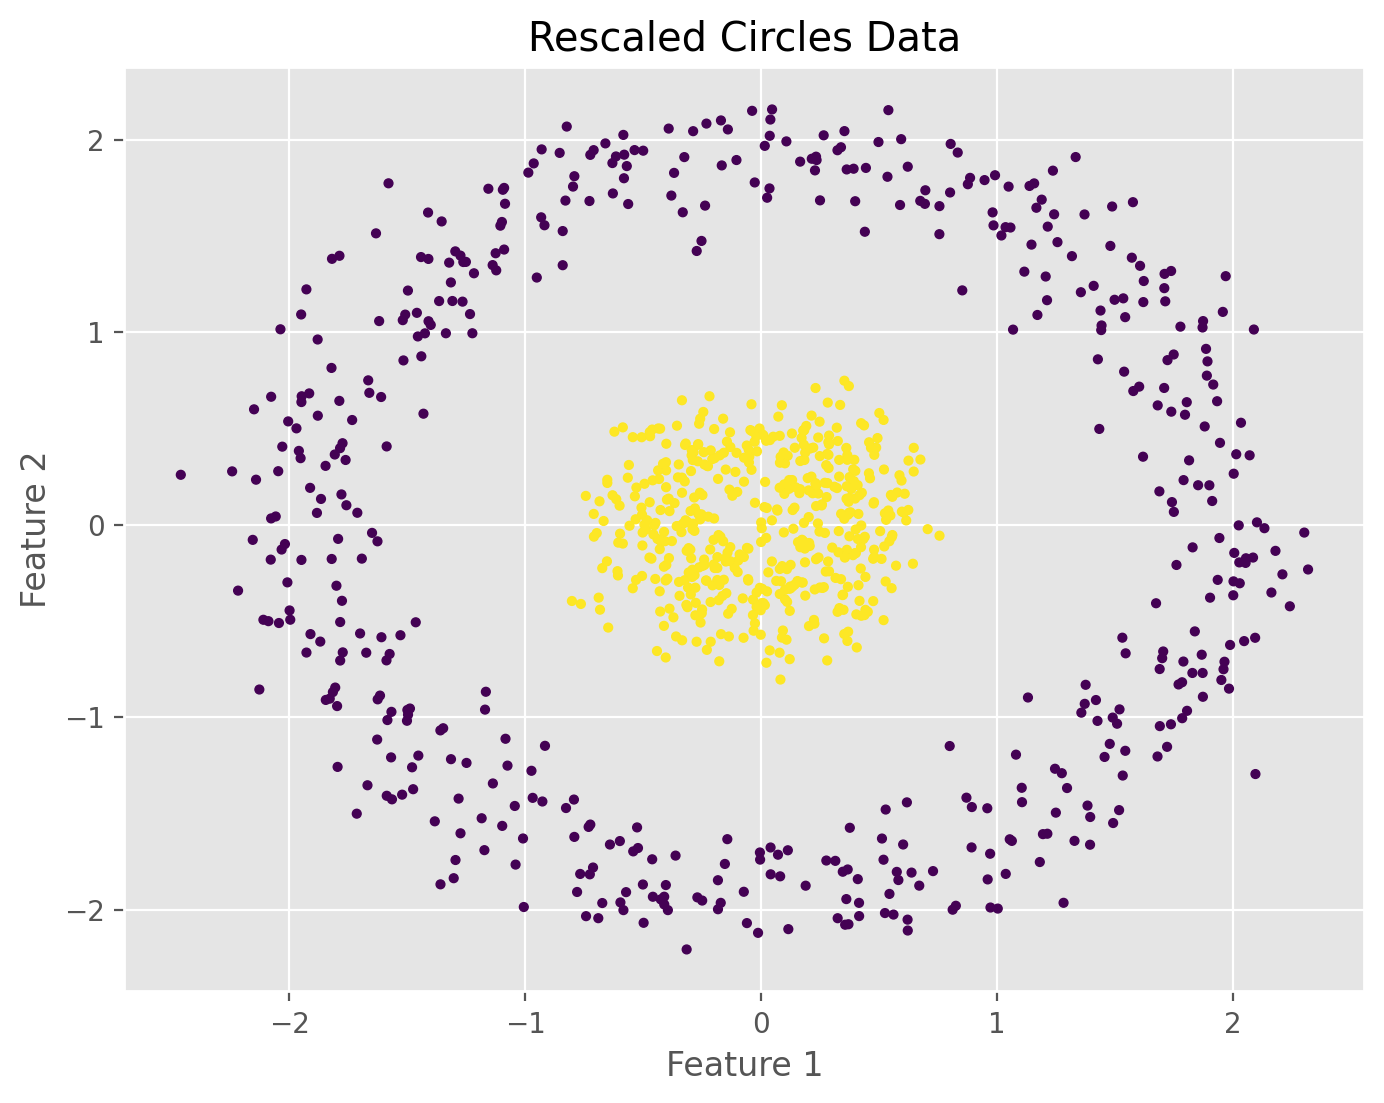

In [4]:
# Rescale the data
scaler = StandardScaler()
circles_X_scaled = scaler.fit_transform(circles_X)

# Plot the rescaled circles data
plt.figure(figsize=(8, 6))
plt.scatter(circles_X_scaled[:, 0], circles_X_scaled[:, 1], c=circles_y, cmap='viridis', s=10)
plt.title("Rescaled Circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 3. Fit DBSCAN on the rescaled data

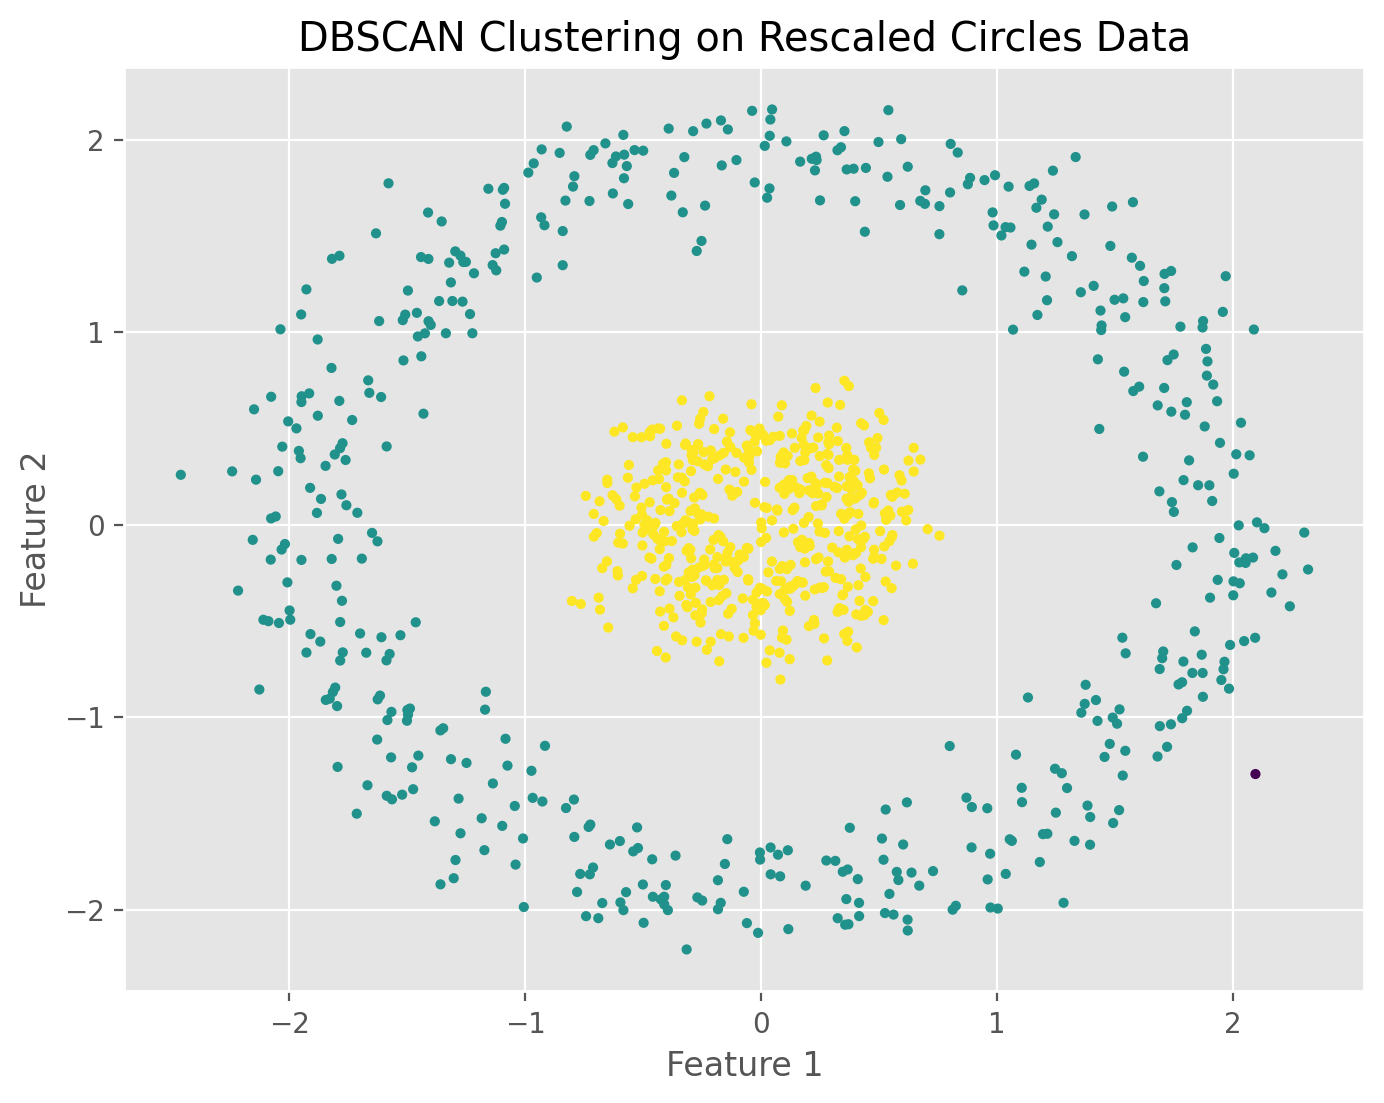

In [5]:
# Fit DBSCAN on the rescaled data
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(circles_X_scaled)

# Get the labels
labels = dbscan.labels_

# Plot the DBSCAN clustering result
plt.figure(figsize=(8, 6))
plt.scatter(circles_X_scaled[:, 0], circles_X_scaled[:, 1], c=labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering on Rescaled Circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 4. Extract the cluster labels.

In [6]:
# Extract the cluster labels
cluster_labels = dbscan.labels_

# Print the cluster labels
print(cluster_labels)


[ 0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1
  1  1  1  0  1  0  1  0  1  0  1  1  0  0  0  1  1  0  1  0  1  1  0  1
  0  0  0  1  1  1  0  0  1  0  1  0  1  1  0  1  0  1  1  1  1  0  0  1
  1  0  1  1  1  1  0  1  0  0  1  0  1  0  1  1  0  0  1  1  1  0  0  1
  1  1  1  1  1  1  1  1  1  1  0  1  1  0  1  1  0  0  0  0  1  1  0  1
  1  1  0  1  1  0  1  0  0  0  1  0  1  0  0  1  1  0  1  1  0  1  0  0
  0  1  1  0  1  0  1  0  1  1  0  1  0  0  0  1  0  1  0  0  0  0  1  0
  0  0  1  1  1  1  1  0  1  0  1  0  0  0  1  0  0  1  1  0  0  1  0  0
  1  1  0  0  0  1  0  0  1  1  1  1  0  1  0  0  1  0  0  1  1  0  1  1
  1  0  1  0  1  1  0  1  0  1  0  1  1  0  0  1  0  1  0  0  0  1  0  0
  1  1  1  0  0  1  0  0  1  0  1  1  0 -1  0  0  1  0  1  0  0  1  1  0
  0  0  0  1  0  0  0  1  1  1  0  0  1  0  1  1  1  0  1  0  0  1  0  1
  1  1  1  1  1  1  0  1  1  0  1  0  0  0  0  0  0  1  0  0  0  1  1  0
  0  0  0  0  0  0  0  1  0  1  0  0  1  0  1  0  0

### 5. How many clusters do you get?

Number of clusters identified by DBSCAN: 2


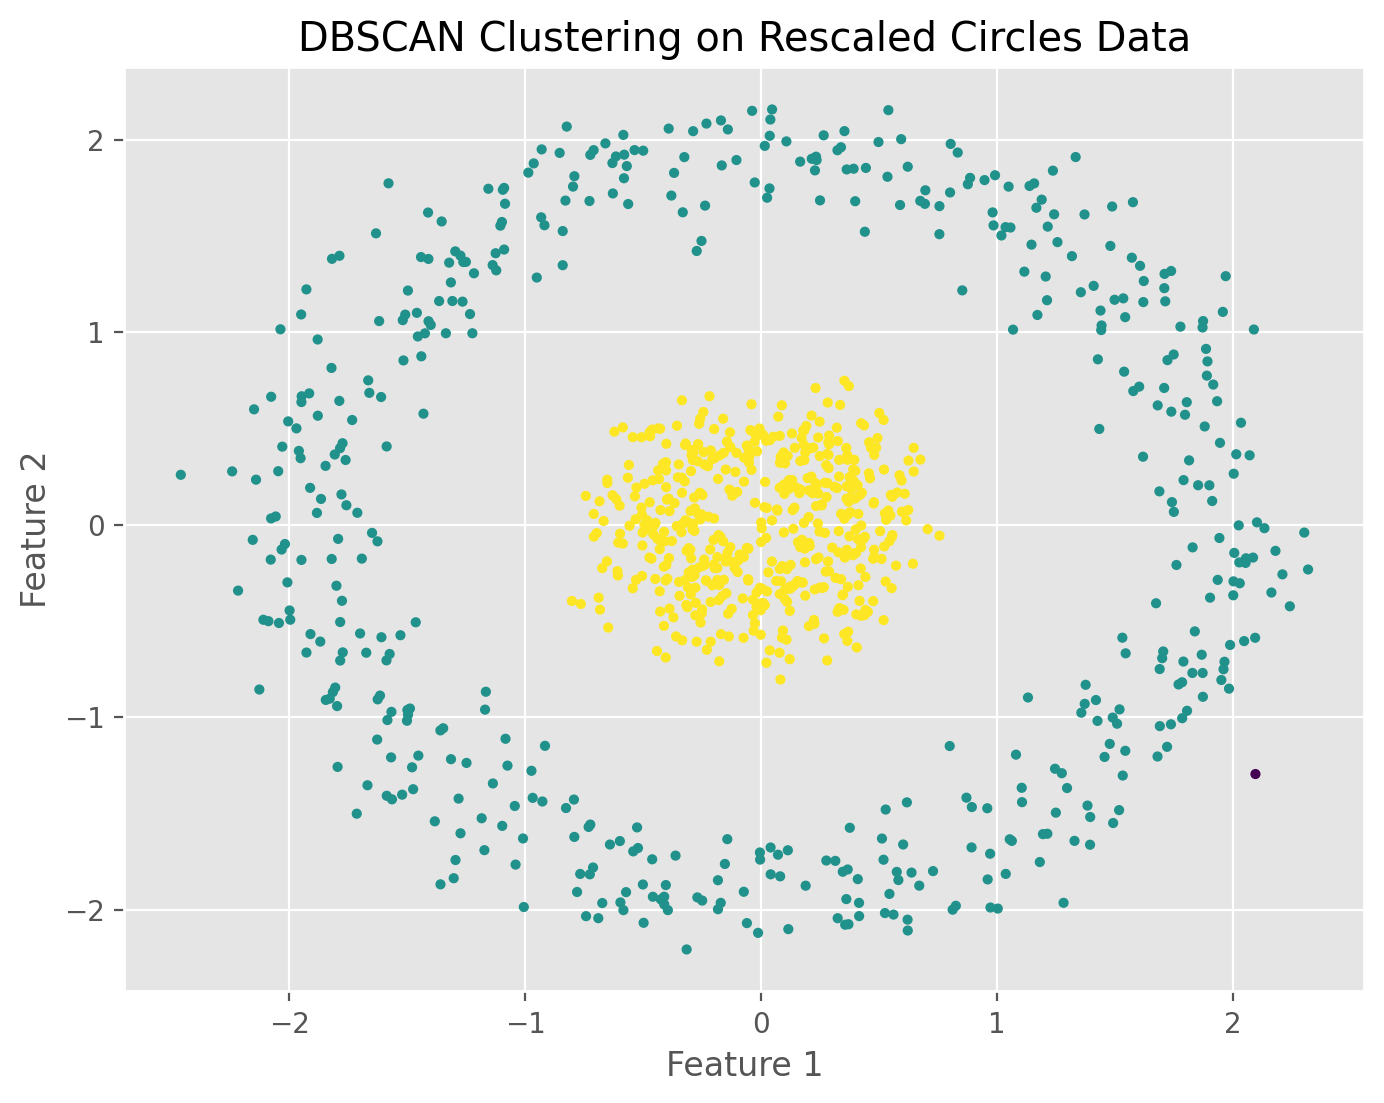

In [8]:
# Determine the number of clusters (excluding noise)
unique_labels = set(cluster_labels) - {-1}
num_clusters = len(unique_labels)

# Print the number of clusters
print(f"Number of clusters identified by DBSCAN: {num_clusters}")

# Plot the DBSCAN clustering result
plt.figure(figsize=(8, 6))
plt.scatter(circles_X_scaled[:, 0], circles_X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering on Rescaled Circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 6. Evaluate DBSCAN

- Visually
- With silhouette score
- Using the true `y`, with homogeneity, completeness and V-measure score

In [10]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

# Compute silhouette score
silhouette_avg = silhouette_score(circles_X_scaled, cluster_labels)

# Compute homogeneity, completeness, and V-measure scores
homogeneity = homogeneity_score(circles_y, cluster_labels)
completeness = completeness_score(circles_y, cluster_labels)
v_measure = v_measure_score(circles_y, cluster_labels)

# Print the evaluation metrics
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"V-measure Score: {v_measure:.4f}")


Silhouette Score: 0.1917
Homogeneity Score: 1.0000
Completeness Score: 0.9897
V-measure Score: 0.9948


### 7.  Extract the core samples. 

How many do you have?

In [11]:
# Extract core samples
core_samples_indices = dbscan.core_sample_indices_

# Determine the number of core samples
num_core_samples = len(core_samples_indices)

# Print the number of core samples
print(f"Number of core samples identified by DBSCAN: {num_core_samples}")


Number of core samples identified by DBSCAN: 988


### 8. Create a scatter plot of the data with coloring according to the cluster labels

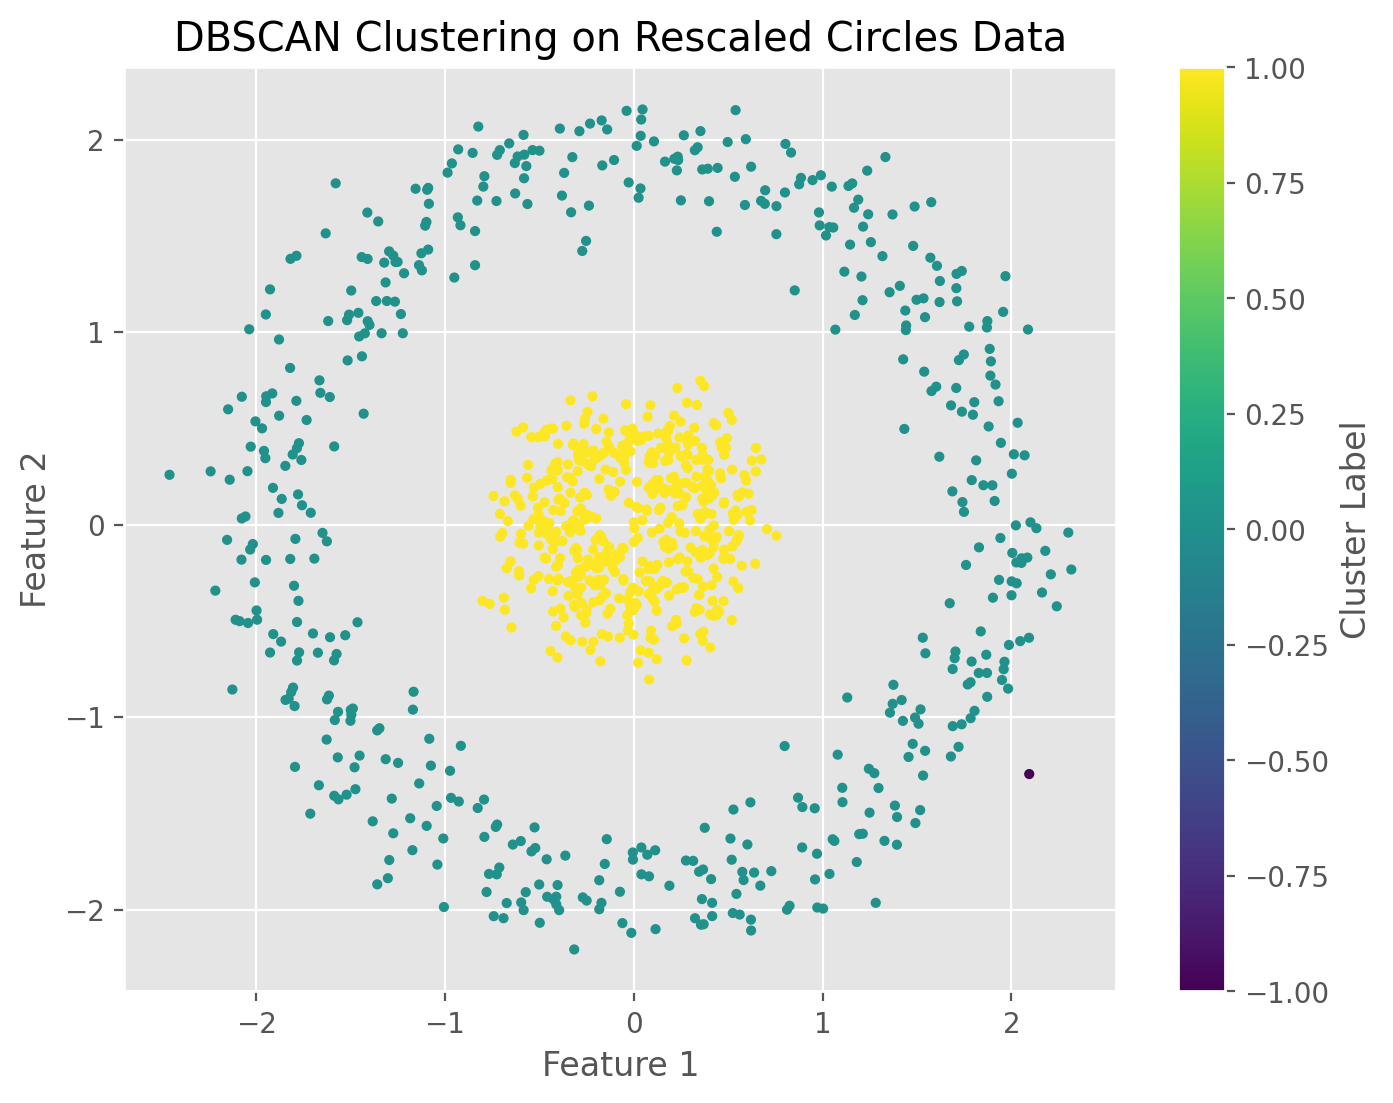

In [12]:
# Create a scatter plot of the data with coloring according to the cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(circles_X_scaled[:, 0], circles_X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering on Rescaled Circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()


## Bonus:

### Try k-means and hierarchical clustering. Which differences do you observe? Which algorithm do you find most suitable in each case? 

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering